In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [4]:
mydata = pd.read_csv('Dataset/Mult_Reg_Yield.csv')
time = mydata.Time
temp = mydata.Temperature
output = mydata.Yield

In [5]:
mymodel = ols('output ~ time+temp',mydata).fit()
mymodel.summary()

C:\Users\apraj\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     27.07
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           2.32e-05
Time:                        16:36:23   Log-Likelihood:                -59.703
No. Observations:                  16   AIC:                             125.4
Df Residuals:                      13   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.8844     40.587     -1.673      0.118    -155.566      19.797
time           0.9061      0.123      7.344      0.000       0.640       1.173
temp          -0.0642      0.164     -0.392      0.702      -0.418       0.290
==============================================================================
Omnibus:                        1.984   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                0.970
Skew:                          -0.078   Prob(JB):                        0.616
Kurtosis:                       1.804   Cond. No.                     3.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

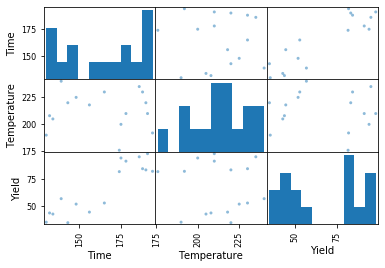

In [6]:
scatter_matrix(mydata)
plt.show()

In [7]:
anova_table = anova_lm(mymodel)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
time,1.0,6777.810462,6777.810462,53.987220,0.000006
temp,1.0,19.252534,19.252534,0.153352,0.701696
Residual,13.0,1632.081378,125.544721,NaN,NaN


In [10]:
pred = mymodel.predict()
res = output - pred
result = [output,pred,res]
result = pd.DataFrame({'Actual' : output, 'Predicted' : pred, 'res' : res})

In [13]:
stats.mstats.normaltest(res) #Ho: its is normal and is accepted in this case as p > 0.05

C:\Users\apraj\AppData\Roaming\Python\Python36\site-packages\scipy\stats\mstats_basic.py:2424: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  np.min(n))


NormaltestResult(statistic=1.9835487618869199, pvalue=0.3709179570178255)

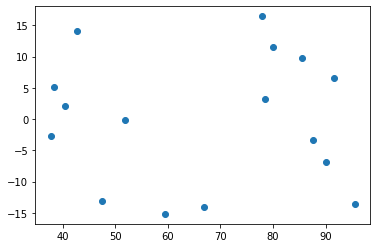

In [15]:
plt.scatter(pred,res)

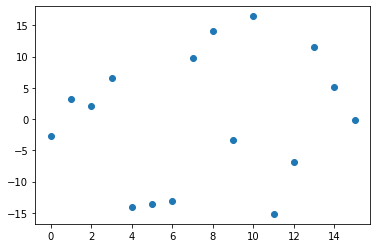

In [19]:
plt.scatter(range(len(res)),res)